# Cleaning Events data

### Importing necessary libraries

In [1]:
pip install pandas matplotlib seaborn wordcloud

  Using cached pandas-1.5.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached matplotlib-3.6.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached wordcloud-1.8.2.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (458 kB)
  Using cached numpy-1.23.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached pytz-2022.6-py2.py3-none-any.whl (498 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached Pillow-9.3.0-cp38-cp38-manylinux_2_28_x86_64.whl (3.3 MB)
  Using cached contourpy-1.0.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (295 kB)

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Loading the data

In [3]:
events = pd.read_csv('../sources/heroku-events.csv')
registered = pd.read_csv('../sources/heroku-checkins.csv')

## Data Cleaning

**Cleaning registered_in_events**

In [4]:
print('Shape of checkins dataframe before cleaning:', registered.shape)

Shape of checkins dataframe before cleaning: (5548, 8)


In [5]:
TO_DROP_REGISTERED = ['id', 'created_at','updated_at','status']

#Drop useless columns in registered_in_events

registered.drop(TO_DROP_REGISTERED, axis=1, inplace=True)

In [6]:
registered = registered[registered["email"].str.contains("@4geeks") == False]
registered = registered[registered["email"].str.contains("@stcsolutions") == False]

In [7]:
print('Shape of checkins dataframe after cleaning:', registered.shape)

Shape of checkins dataframe after cleaning: (5526, 4)


**Cleaning events**

In [8]:
print('Shape of events dataframe before cleaning:', events.shape)

Shape of events dataframe before cleaning: (194, 31)


In [9]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   description                  192 non-null    object 
 2   title                        194 non-null    object 
 3   lang                         86 non-null     object 
 4   url                          192 non-null    object 
 5   banner                       191 non-null    object 
 6   capacity                     194 non-null    int64  
 7   starting_at                  194 non-null    object 
 8   ending_at                    194 non-null    object 
 9   status                       194 non-null    object 
 10  created_at                   194 non-null    object 
 11  updated_at                   194 non-null    object 
 12  author_id                    0 non-null      float64
 13  event_type_id       

In [10]:
#Useless columns

TO_DROP_EVENTS = ['created_at','updated_at','organization_id','author_id']

#Drop useless columns in events

events.drop(TO_DROP_EVENTS, axis=1, inplace=True)

#Drop null columns in events
events.dropna(axis=1, how='all', inplace=True)



In [11]:
print('Shape of events dataframe after cleaning:', events.shape)

Shape of events dataframe after cleaning: (194, 25)


**Joining both datasets**

In [12]:
merged = pd.merge(registered, events, left_on="event_id", right_on="id").drop(['id','excerpt','eventbrite_sync_description','eventbrite_url','eventbrite_id','banner'], axis=1)
print('Shape of merged dataframe:', merged.shape)

Shape of merged dataframe: (5526, 23)


In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5526 entries, 0 to 5525
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   email                   5526 non-null   object 
 1   attendee_id             1186 non-null   float64
 2   event_id                5526 non-null   int64  
 3   attended_at             0 non-null      float64
 4   description             5526 non-null   object 
 5   title                   5526 non-null   object 
 6   lang                    2826 non-null   object 
 7   url                     5526 non-null   object 
 8   capacity                5526 non-null   int64  
 9   starting_at             5526 non-null   object 
 10  ending_at               5526 non-null   object 
 11  status                  5526 non-null   object 
 12  event_type_id           2826 non-null   float64
 13  host                    2437 non-null   object 
 14  academy_id              4663 non-null   

**Cleaning merged dataframe**

In [14]:
merged['starting_at'] = merged['starting_at'].apply(pd.to_datetime)
merged['ending_at'] = merged['ending_at'].apply(pd.to_datetime)
merged['published_at'] = merged['published_at'].apply(pd.to_datetime)

#Changing format
merged['starting_at'] = merged['starting_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
merged['ending_at'] = merged['ending_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
merged['published_at'] = merged['published_at'].dt.strftime('%Y-%m-%d %H:%M:%S')

#Format change also changed the column type to object, so we need to convert it to datetime again 
merged['starting_at'] = merged['starting_at'].apply(pd.to_datetime)
merged['ending_at'] = merged['ending_at'].apply(pd.to_datetime)
merged['published_at'] = merged['published_at'].apply(pd.to_datetime)

In [15]:
#Replacing commas in certain columns

merged['tags'] = merged['tags'].str.replace(',', '|')
merged['description'] = merged['description'].str.replace(',', ' ')
merged['title'] = merged['title'].str.replace(',', ' ')

#Replacing nulls with 'undefined'

merged = merged.replace(np.nan, 'Undefined', regex=True)

In [16]:
#Assign language to events with missing info.

merged['lang'] = np.where((merged['event_id'].isin([35,36,38,40,414,37,130,123,41,122,141,42,146,125,145,46,48,47,49,131,
                                                    127,85,86,84,121,128,119,181,189,184,135,134,136,182,192,193,137,138,
                                                    139,186,195,198,217,196,213,203,212,205,204,209,211,218,262,339,268,
                                                    260,263,142,183,140,432,261,363,264,344,340,308,316])),'es', merged['lang'])

merged['lang'] = np.where((merged['event_id'].isin([39,43,187,45,44,190,144,50,51,126,180,191,132,129,120,185,188,197,200,
                                                    194,199,201,202,206,216,208,252,214,251,254,368,357,124,207,210,215])),'en', 
                                                    merged['lang'])

In [17]:
print('Shape of merged dataframe after cleaning:', merged.shape)

Shape of merged dataframe after cleaning: (5526, 23)


In [18]:
#create a event tags dataframe to explode tags

tags_df = merged.groupby(['event_id','title','starting_at','tags'])['tags'].agg(['count']).reset_index()

In [19]:
tags_df.rename(columns = {'count':'event_registrants'}, inplace = True)
tags_df.shape

(162, 5)

In [20]:
#converting tags column in lowercase and then in a list instead of string

tags_df['tags'] = tags_df['tags'].str.lower()

tags_df['tags'] = tags_df.tags.apply(lambda x: x.split('|'))

In [21]:
#Exploding the list to rows

tags_df = tags_df.explode('tags').drop_duplicates()

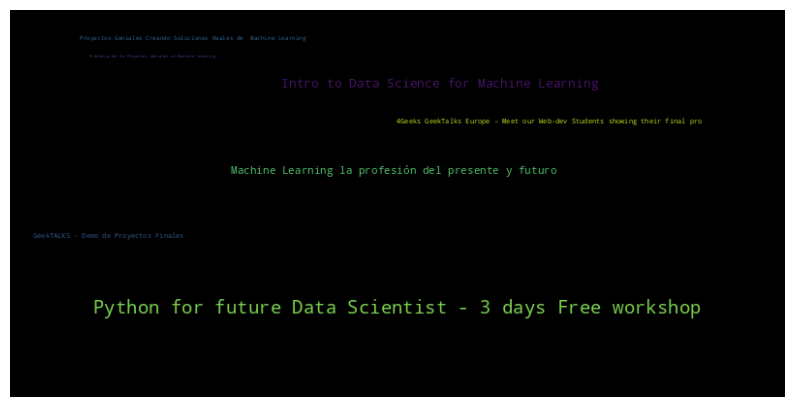

In [22]:
#Creating a word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud


df_wc = tags_df[(tags_df['tags'] =='tech-machinelearning')]

df_wc = df_wc[['title','event_registrants']]
df_wc = df_wc.set_index('title').to_dict()['event_registrants']

wc = WordCloud(width=800, height=400, max_words=200,).generate_from_frequencies(df_wc)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
#Saving joined dataset

merged.to_csv('../output/cleaned_events.csv',index = False)
tags_df.to_csv('../output/cleaned_tags.csv',index = False)

**Verifying first rows of new dataframes**

In [35]:
ver1 = pd.read_csv('../sources/cleaned-heroku-events.csv')
ver2 = pd.read_csv('../sources/cleaned-event-registries.csv')


In [36]:
ver2.shape

(194, 26)

In [34]:
d2.shape

(267, 5)

**When joining with form_entries**

In [26]:
#forms = pd.read_csv('../sources/clean.csv')

In [27]:
#final_df = pd.merge(merged, forms[['email','country','deal_status','won_at']],on='email', how='left')


In [28]:
#final_df[['starting_at','won_at']] = final_df[['starting_at','won_at']].apply(pd.to_datetime)

In [29]:
#final_df['days_until_deal'] = (final_df['won_at'] - final_df['starting_at']).dt.days


In [30]:
#final_df[final_df['won_at'] > final_df['starting_at']][['email','deal_status','starting_at','won_at','days_until_deal']].sort_values('days_until_deal')